## Cosmological Distance Measures and the Expansion History of the Universe

In this project, we model how various cosmological distance measures evolve with redshift $z$ for different universe models — including matter-dominated, radiation-dominated, cosmological-constant–dominated ($\Lambda$-only), open, and the consensus flat $\Lambda$-CDM universe.  

We make use of the **Friedmann–Lemaître–Robertson–Walker (FLRW)** metric, which assumes a homogeneous and isotropic universe.  
The expansion rate is given by the **Hubble parameter**:

$$H(z) = H_0 \sqrt{\Omega_m (1 + z)^3 + \Omega_r (1 + z)^4 + \Omega_k (1 + z)^2 + \Omega_\Lambda}$$

where:
- $H_0$ is the present-day Hubble constant,  
- $ \Omega_m, \Omega_r, \Omega_\Lambda $ represent the matter, radiation, and dark energy density parameters,  
- $\Omega_k = 1 - \Omega_m - \Omega_r - \Omega_\Lambda$ accounts for curvature.

---

### Comoving, Luminosity, and Angular Diameter Distances

1. **Comoving Distance**  
   The comoving distance between an observer and an object at redshift \( z \) is:

   $$D_C(z) = c \int_0^z \frac{dz'}{H(z')}$$

2. **Luminosity Distance**  
   Relates an object's intrinsic luminosity to its observed flux:

   $$D_L(z) = (1 + z) \, D_C(z)$$

3. **Angular Diameter Distance**  
   Relates an object's physical size to its observed angular size:

   $$D_A(z) = \frac{D_C(z)}{1 + z}$$

---

### Expansion History

The **scale factor** $a(t)$ and **lookback time** $t - t{_0}$ describe the universe’s expansion history.  
They are related by:

$$a(t) = \frac{1}{1 + z}$$
$$t_0 - t = \int_0^z \frac{dz'}{(1 + z') H(z')}$$

---

The following Python code numerically evaluates and visualizes these quantities for multiple cosmological models using the `Astropy` cosmology module.

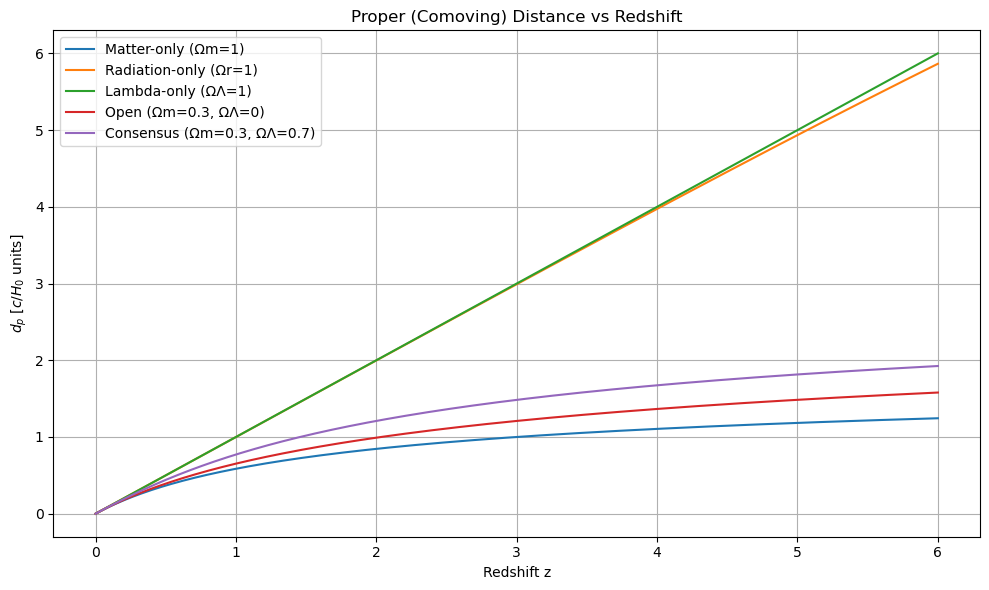

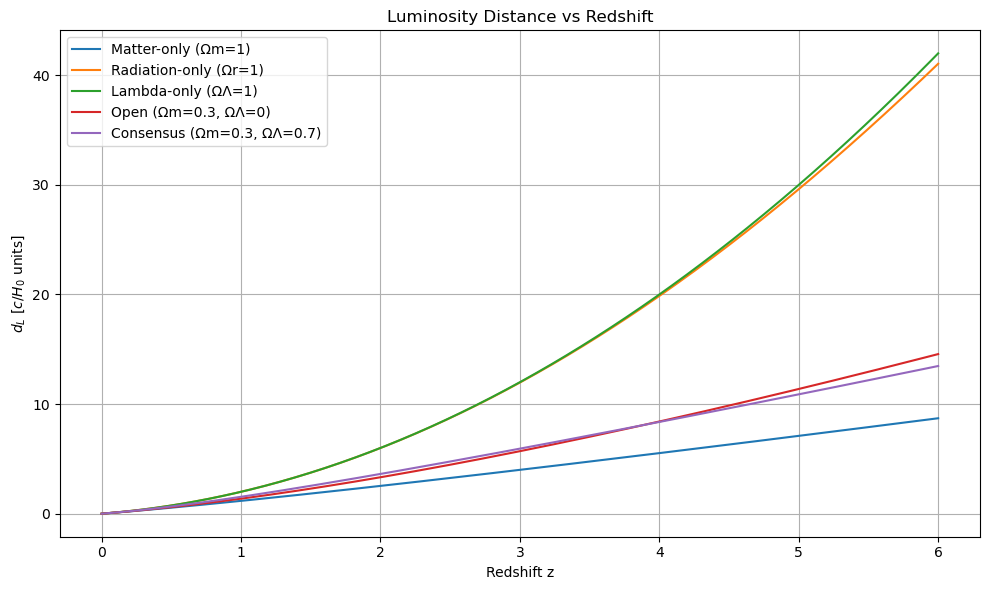

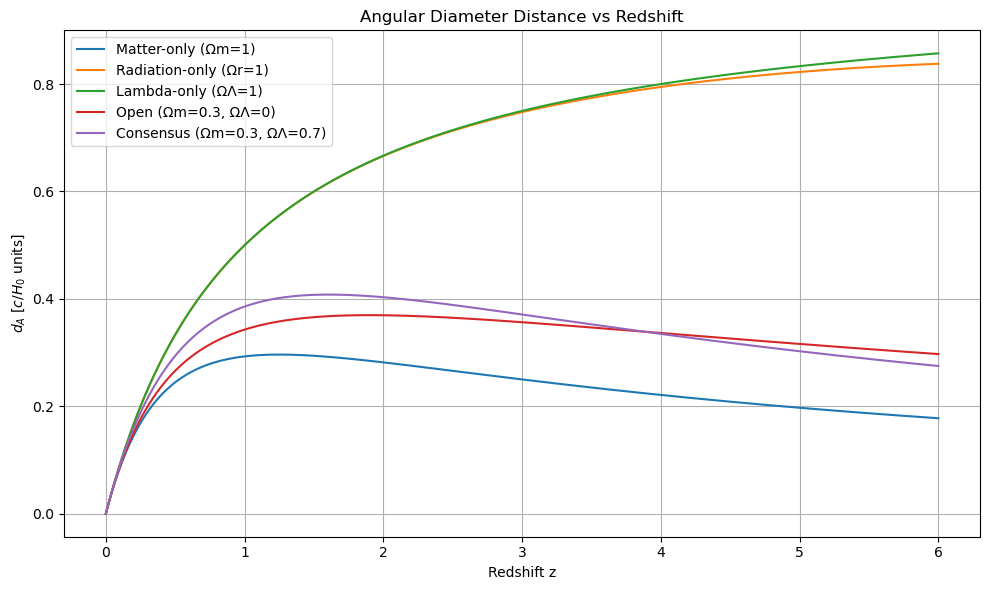

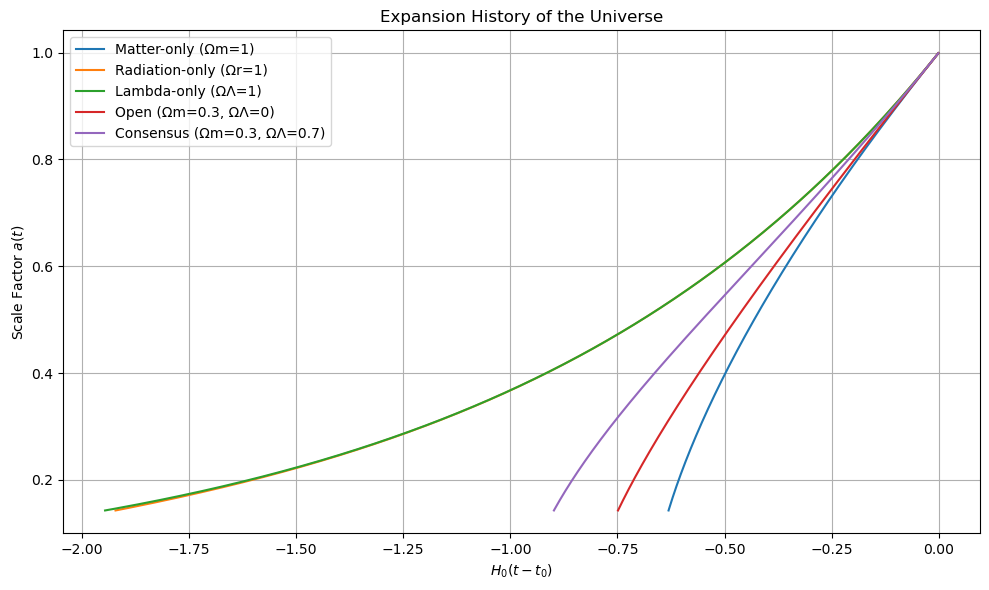

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM, LambdaCDM
import astropy.units as u
from astropy.constants import c

z = np.linspace(0, 6, 500)

H0 = 70

cosmo_matter_only = FlatLambdaCDM(H0=H0, Om0=1.0, Tcmb0=0.0 * u.K)
cosmo_radiation_only = FlatLambdaCDM(H0=H0, Om0=1e-5, Tcmb0=2.73 * u.K)
cosmo_lambda_only = FlatLambdaCDM(H0=H0, Om0=0.0, Tcmb0=0.0 * u.K)
cosmo_open = LambdaCDM(H0=H0, Om0=0.3, Ode0=0.0, Tcmb0=0.0 * u.K)
cosmo_consensus = FlatLambdaCDM(H0=H0, Om0=0.3, Tcmb0=2.73 * u.K)

cosmologies = {
    'Matter-only (Ωm=1)': cosmo_matter_only,
    'Radiation-only (Ωr=1)': cosmo_radiation_only,
    'Lambda-only (ΩΛ=1)': cosmo_lambda_only,
    'Open (Ωm=0.3, ΩΛ=0)': cosmo_open,
    'Consensus (Ωm=0.3, ΩΛ=0.7)': cosmo_consensus,
}

def hubble_distance(cosmo):
    return (c / cosmo.H0).to(u.Mpc)

dp = {}
dL = {}
dA = {}

for name, cosmo in cosmologies.items():
    Hd = hubble_distance(cosmo)
    dp[name] = cosmo.comoving_distance(z) / Hd
    dL[name] = cosmo.luminosity_distance(z) / Hd
    dA[name] = cosmo.angular_diameter_distance(z) / Hd

def plot_distance(dist_dict, ylabel, title):
    plt.figure(figsize=(10, 6))
    for name, values in dist_dict.items():
        plt.plot(z, values.value, label=name)
    plt.xlabel('Redshift z')
    plt.ylabel(f'{ylabel} [$c/H_0$ units]')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_distance(dp, r'$d_p$', 'Proper (Comoving) Distance vs Redshift')
plot_distance(dL, r'$d_L$', 'Luminosity Distance vs Redshift')
plot_distance(dA, r'$d_A$', 'Angular Diameter Distance vs Redshift')

plt.figure(figsize=(10, 6))
z_for_t = np.linspace(0.001, 6, 500)

for name, cosmo in cosmologies.items():
    a = 1 / (1 + z_for_t)
    lookback = cosmo.lookback_time(z_for_t)
    H0_t = - (cosmo.H0 * lookback).to('').value
    plt.plot(H0_t, a, label=name)

plt.xlabel(r'$H_0(t - t_0)$')
plt.ylabel('Scale Factor $a(t)$')
plt.title('Expansion History of the Universe')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()